In [32]:
# %load_ext autoreload
# %reload_ext autoreload
# %autoreload 2

In [33]:
import os
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')
# os.chdir('C:\\Users\\gratten\\Documents\\python\\projects\\data_cleanse')

import pandas as pd
from prep import filter
from prep import sort
from plot import bar
from utility import generate

In [34]:
fileName = 'filelist_7_15'
df_og = pd.read_csv('datasets/' + fileName + '.csv', sep=';')

In [35]:
df = filter.sld(df_og)

In [36]:
dups = df[df.duplicated(['name_low'], keep=False)]
dups = dups.sort_values(['name_low'])

In [37]:
dups = dups.reset_index()

In [38]:
dups.head()

,index,Name,Format,size,modified,created,path,name_low
0,199469,#40 CHAIN.SLDASM,SLDASM,"98,273",10/12/2018 13:43:23,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 chain.sldasm
1,13308,#40 Chain.SLDASM,SLDASM,"92,370",06/19/2020 16:04:50,02/21/2016 22:51:10,R:\Doc\SolidWorks\CONVEYOR,#40 chain.sldasm
2,199473,#40 PIN RIVETED.SLDPRT,SLDPRT,"55,996",02/24/2017 15:31:59,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 pin riveted.sldprt
3,46813,#40 PIN RIVETED.SLDPRT,SLDPRT,"52,842",11/20/2014 10:11:00,02/21/2016 23:05:11,R:\Doc\SolidWorks\HS4989 - QUAKER MAID MEATS,#40 pin riveted.sldprt
4,33754,#40 PIN RIVETEDRev2.SLDPRT,SLDPRT,"52,722",11/19/2014 22:34:28,02/21/2016 22:59:28,R:\Doc\SolidWorks\HS4836-4 TWO FLAP CLOSER (ME...,#40 pin rivetedrev2.sldprt


In [39]:
# dups['path'].value_counts()

In [40]:
top_offenders = dups['path'].value_counts().index.to_list()

In [41]:
top_offenders[0]

'R:\\Doc\\SolidWorks\\HS4937, CELOX'

In [42]:
# choose offender, 0 is top
num = 0

directory = top_offenders[num]

file_list = []
for i in range(len(dups['path'])):
    if dups['path'][i] == top_offenders[num]:
        file_list.append(dups['name_low'].iloc[i])

In [43]:
len(file_list)

332

In [44]:
file_list[0]

'109770.sldprt'

In [45]:
dups_trimmed = dups[(dups['Name'] == '159665.SLDPRT')]

In [46]:
dups_trimmed.head()

,index,Name,Format,size,modified,created,path,name_low
2345,36851,159665.SLDPRT,SLDPRT,"53,882",06/24/2019 10:45:22,02/21/2016 23:00:07,"R:\Doc\SolidWorks\HS4937, CELOX",159665.sldprt


In [47]:
file_paths = {}
for file in file_list:
    dups_trimmed = dups[(dups['name_low'] == file)]
    path_list = []
    for path in dups_trimmed['path']:
        path_list.append(path)
    file_paths[file] = path_list

In [48]:
# for k, v in file_paths.items():
#     print(k, len(v))

In [61]:
for k, v in file_paths.items():
    print(k, len(v))

109770.sldprt 3
159665.sldprt 2
20095-319-04-2.sldprt 3
20095-319-04-3.sldprt 3
20095-319-04.sldasm 2
20095-321-10.sldprt 4
20095-321-11.sldprt 4
20095-321-12-2.sldprt 4
20095-321-12.sldasm 3
20095-501-11.sldprt 6
20095-601-03-2.sldprt 6
20095-601-03-3.sldprt 6
20095-601-03-4.sldprt 6
20095-601-03.sldasm 6
20095-601-04-2.sldprt 6
20095-601-04-3.sldprt 6
20095-601-04-4.sldprt 6
20095-601-04.sldasm 6
20095-601-05-2.sldprt 8
20095-601-05-3.sldprt 8
20095-601-05-4.sldprt 8
20095-601-05.sldasm 8
20095-601-06-2.sldprt 6
20095-601-06-3.sldprt 6
20095-601-06-4.sldprt 6
20095-601-06.sldasm 6
20095-601-07-2.sldprt 6
20095-601-07-3.sldprt 6
20095-601-07-4.sldprt 6
20095-601-07.sldasm 6
20095-601-08-2.sldprt 5
20095-601-08-3.sldprt 5
20095-601-08-4.sldprt 5
20095-601-08.sldasm 5
20095-601-09-2.sldprt 6
20095-601-09-3.sldprt 6
20095-601-09-4.sldprt 6
20095-601-09.sldasm 7
20095-601-10.sldprt 8
20095-601-11.sldasm 5
20095-601-12-2.sldprt 5
20095-601-12-3.sldprt 5
20095-601-12.sldasm 5
20095-601-13.s

In [49]:
totalFiles = 0
for k, v in file_paths.items():
    totalFiles += len(v)

In [50]:
occur_list = []
for k, v in file_paths.items():
    if len(v) not in occur_list:
        occur_list.append(len(v))

In [51]:
occur_list

[3, 2, 4, 6, 8, 5, 7, 13, 15, 18, 12, 9, 17, 20, 21, 28, 11, 10, 19, 57, 14]

In [52]:
occur_dict = {}
for i in occur_list:
    occur_dict[i] = 0
    for v in file_paths.values():
        if i == len(v):
            occur_dict[i] += 1

In [53]:
min(occur_dict.keys())

2

In [59]:
for value in occur_dict.values():
    print(value)

In [54]:
num_list = []
occur_list = []
for i in range(len(occur_dict)):
    key = min(occur_dict.keys())
    num_list.append(key)
    value = occur_dict.pop(key)
    occur_list.append(value)    

In [55]:
len(num_list)

21

In [56]:
len(occur_list)

21

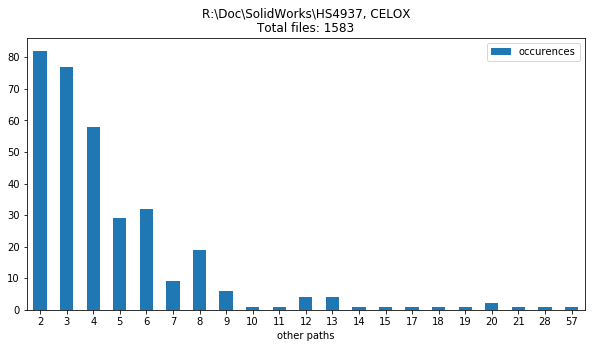

In [57]:
df = pd.DataFrame({'other paths':num_list, 'occurences':occur_list})
title = f'{directory}\nTotal files: {totalFiles}'
ax = df.plot.bar(x='other paths', y='occurences', rot=0, figsize=(10, 5), title = title)

In [58]:
num_list[0]

2